[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/crunchdao/quickstarters/blob/feat/broad-1/competitions/broad-1/quickstarters/first-draft/first-draft.ipynb)

# Broad Institute: Autoimmune Disease Machine Learning Challenge

![Cover](https://raw.githubusercontent.com/crunchdao/quickstarters/refs/heads/feat/broad-1/competitions/broad-1/cover.jpg)

## Crunch 1 – Quickstarter

## The Problem

Autoimmune diseases arise when the immune system mistakenly targets healthy cells. Affecting 50M people in the U.S., with rising global cases, Inflammatory Bowel Disease (IBD) is one of the most prevalent forms. IBD involves a breakdown in the gut barrier, triggering the immune system to attack proteins erroneously recognized as foreign, leading to persistent inflammation. This cycle of flares and remission increases the risk of colorectal cancer (up to two-fold). Although modern treatments have improved survival, IBD remains challenging to diagnose and treat due to its complex symptoms and multifactorial nature.
Pathologists rely on gut tissue images to diagnose and treat IBD, guiding decisions on the most suitable drug treatments and predicting cancer risk. These tissue images, combined with recent advances in genomics, offer a valuable dataset for machine learning models to revolutionize IBD diagnosis and treatment.

## The Solution

In Crunch 1, you will train an algorithm to predict spatial transcriptomics data (gene expression in each cell). In other words predict the gene expression (Y) in cells from specific tissue patches based on the H&E images (X) and surrounding spatial transcriptomics data.

#### X (Input):

- **HE_registered**: The registered H&E image, aligned to the Xenium spatial transcriptomics coordinate system. This is the recommended file to use as it is already aligned with the spatial transcriptomics data.

- **HE_original**: The original H&E image in its native pixel coordinates, before alignment. If you prefer to handle alignment yourself, you can use this, but it may require additional processing.

#### Y (Output):

- **anucleus**: This file contains the aggregated gene expression data for each nucleus. It is log1p-normalized and stores the gene expression profiles for 460 genes per nucleus. This is the primary target (Y) for your model.

- **transcripts**: This file contains the spatial locations and individual gene expression data for each transcript in the tissue, linked to specific nuclei. It provides the raw gene expression information before aggregation.

# Preliminary Setup Step

In [1]:
%pip install crunch-cli==5.0.0b3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: crunch-cli
    Found existing installation: crunch-cli 3.19.0
    Uninstalling crunch-cli-3.19.0:
      Successfully uninstalled crunch-cli-3.19.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
# will be remove once live
%env API_BASE_URL=https://api.hub.crunchdao.io/
%env WEB_BASE_URL=https://hub.crunchdao.io/

env: API_BASE_URL=https://api.hub.crunchdao.io/
env: WEB_BASE_URL=https://hub.crunchdao.io/


In [3]:
# import and instantiante the crunch package in this notebook
import crunch
crunch = crunch.load_notebook(__name__)

loaded inline runner with module: <module '__main__'>


# Download the datasets

In [4]:
# Registering to this Crunch

# Step 1:
# Create an account here: https://hub.crunchdao.io/auth/register

# Step 2:
# Get your set token here: https://hub.crunchdao.io/competitions/broad/submit/via/notebook
!crunch setup --notebook broad jean-testing --token KZpHjtacuGQavLY5wVSMB42cYYuFUg4Lq6kbfacmGnTr7J76uWLSWBsw6gb6xbcB

you appear to have never submitted code before
download data/train/UC6_NI.zarr.zip from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/76/train/UC6_NI.zarr.zip (706148035 bytes)
download data/train/DC5.zarr.zip from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/76/train/DC5.zarr.zip (104611669 bytes)
download data/train/UC1_NI.zarr.zip from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/76/train/UC1_NI.zarr.zip (889731697 bytes)
download data/train/DC1.zarr.zip from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/76/train/DC1.zarr.zip (720790717 bytes)
download data/train/UC1_I.zarr.zip from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/76/train/UC1_I.zarr.zip (855271807 bytes)
download data/train/UC6_I.zarr.zip from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/76/train/UC6_I.zarr.zip (92358185

In [5]:
import os
from tqdm.notebook import tqdm
import crunch
crunch = crunch.load_notebook() # setup the crunch cli in notebook mode

loaded inline runner with module: <module '__main__'>


In [6]:
# Unziping datasets
# Iterate through the list ["test", "train"], representing directories to process
for directory in tqdm(["test", "train"]):
    # Construct the full path to each directory (e.g., "data/test/" or "data/train/")
    directory = f"data/{directory}/"

    # Iterate through each file in the current directory
    for file in tqdm(os.listdir(directory)):
        # Skip files that do not have a ".zip" extension
        if not file.endswith(".zip"):
            continue

        # Change to the directory and unzip the current file using a system command
        os.system(f"cd {directory}; unzip {file}")

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Archive:  UC1_NI.zarr.zip
   creating: UC1_NI.zarr/
  inflating: __MACOSX/._UC1_NI.zarr  
   creating: UC1_NI.zarr/tables/
  inflating: __MACOSX/UC1_NI.zarr/._tables  
  inflating: UC1_NI.zarr/.DS_Store   
  inflating: __MACOSX/UC1_NI.zarr/._.DS_Store  
   creating: UC1_NI.zarr/images/
  inflating: __MACOSX/UC1_NI.zarr/._images  
  inflating: UC1_NI.zarr/.zgroup     
  inflating: __MACOSX/UC1_NI.zarr/._.zgroup  
  inflating: UC1_NI.zarr/zmetadata   
  inflating: __MACOSX/UC1_NI.zarr/._zmetadata  
   creating: UC1_NI.zarr/tables/cell_id-group/
  inflating: __MACOSX/UC1_NI.zarr/tables/._cell_id-group  
  inflating: UC1_NI.zarr/tables/.DS_Store  
  inflating: __MACOSX/UC1_NI.zarr/tables/._.DS_Store  
   creating: UC1_NI.zarr/tables/anucleus/
  inflating: __MACOSX/UC1_NI.zarr/tables/._anucleus  
  inflating: UC1_NI.zarr/tables/.zgroup  
  inflating: __MACOSX/UC1_NI.zarr/tables/._.zgroup  
   creating: UC1_NI.zarr/images/HE_original/
  inflating: __MACOSX/UC1_NI.zarr/images/._HE_original  


  0%|          | 0/8 [00:00<?, ?it/s]

Archive:  DC5.zarr.zip
   creating: DC5.zarr/
  inflating: __MACOSX/._DC5.zarr     
   creating: DC5.zarr/tables/
  inflating: __MACOSX/DC5.zarr/._tables  
  inflating: DC5.zarr/.DS_Store      
  inflating: __MACOSX/DC5.zarr/._.DS_Store  
   creating: DC5.zarr/images/
  inflating: __MACOSX/DC5.zarr/._images  
  inflating: DC5.zarr/.zgroup        
  inflating: __MACOSX/DC5.zarr/._.zgroup  
  inflating: DC5.zarr/zmetadata      
  inflating: __MACOSX/DC5.zarr/._zmetadata  
   creating: DC5.zarr/tables/cell_id-group/
  inflating: __MACOSX/DC5.zarr/tables/._cell_id-group  
   creating: DC5.zarr/tables/anucleus/
  inflating: __MACOSX/DC5.zarr/tables/._anucleus  
  inflating: DC5.zarr/tables/.zgroup  
  inflating: __MACOSX/DC5.zarr/tables/._.zgroup  
   creating: DC5.zarr/images/HE_original/
  inflating: __MACOSX/DC5.zarr/images/._HE_original  
  inflating: DC5.zarr/images/.zgroup  
  inflating: __MACOSX/DC5.zarr/images/._.zgroup  
   creating: DC5.zarr/images/HE_nuc_original/
  inflating: __

# Data Preparation

## Imports

In [7]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 52.4 MB/s eta 0:00:0000:01
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [8]:
"""
This is a basic example of what you need to do to enter the competition.
The code will not have access to the internet (or any socket related operation).
"""
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
import spatialdata_plot
import spatialdata as sd
import scanpy as sc

## The datasets

In [10]:
sdata = sd.read_zarr(f"data/train/UC1_NI.zarr")
sdata

/opt/conda/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


SpatialData object, with associated Zarr store: /home/jovyan/work/workspace/BROAD institute/data/train/UC1_NI.zarr
├── Images
│     ├── 'HE_nuc_original': DataArray[cyx] (1, 21000, 22000)
│     └── 'HE_original': DataArray[cyx] (3, 21000, 22000)
└── Tables
      ├── 'anucleus': AnnData (80037, 460)
      └── 'cell_id-group': AnnData (93686, 0)
with coordinate systems:
    ▸ 'global', with elements:
        HE_nuc_original (Images), HE_original (Images)

## Input (X) - H&E Images

INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


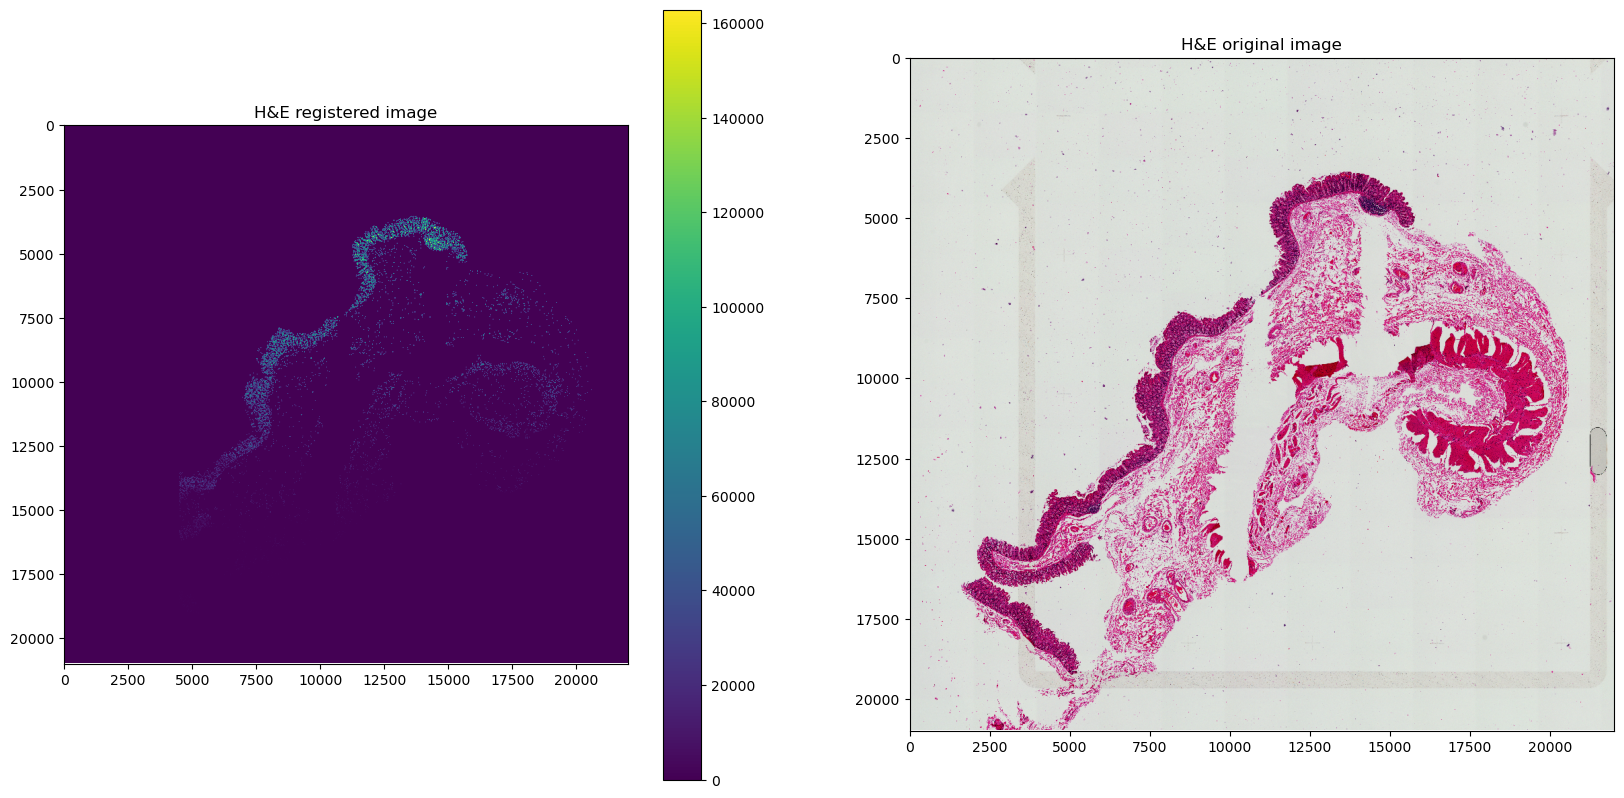

In [23]:
##  H&E pathology image
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes = axes.flatten()  # Flatten the axes to easily index them

sdata.pl.render_images("HE_nuc_original").pl.show(ax=axes[0], title="H&E registered image", coordinate_systems="global")
sdata.pl.render_images("HE_original").pl.show(ax=axes[1], title="H&E original image", coordinate_systems="global")

## Target (Y) -  aggregated gene expression data for each cell

In [38]:
## Get the list of gene concerned in crunch 1
gene_name_list = sdata['anucleus'].var['gene_symbols'].values
print(gene_name_list)

['A2M' 'ACP5' 'ACTA2' 'ADAMTSL3' 'AFAP1L2' 'AHR' 'ALDH1B1' 'ANO1' 'ANXA1'
 'AQP1' 'AQP8' 'AREG' 'ASCL2' 'ATIC' 'AVIL' 'AXL' 'BANK1' 'BATF' 'BCAS1'
 'BMX' 'BNC2' 'BTNL9' 'C1QA' 'C1QC' 'C3' 'C7' 'CA1' 'CA2' 'CA4' 'CA7'
 'CADM1' 'CADPS' 'CALCB' 'CARD9' 'CAV1' 'CBLB' 'CCK' 'CCL1' 'CCL11'
 'CCL13' 'CCL19' 'CCL2' 'CCL20' 'CCL22' 'CCL23' 'CCL24' 'CCL3L1' 'CCL4'
 'CCL5' 'CCL7' 'CCL8' 'CCNB1' 'CCR1' 'CCR2' 'CCR3' 'CCR4' 'CCR5' 'CCR6'
 'CCR7' 'CCR8' 'CD163' 'CD163L1' 'CD19' 'CD1C' 'CD2' 'CD209' 'CD22'
 'CD247' 'CD27' 'CD300E' 'CD36' 'CD38' 'CD3D' 'CD3G' 'CD4' 'CD40LG' 'CD5'
 'CD55' 'CD6' 'CD68' 'CD69' 'CD7' 'CD79A' 'CD83' 'CD86' 'CD8A' 'CD8B'
 'CD9' 'CDC20' 'CDCA7' 'CDHR5' 'CDK1' 'CDK15' 'CDKN2B' 'CEACAM1' 'CEACAM7'
 'CELF2' 'CES1' 'CES2' 'CFTR' 'CHAT' 'CHGB' 'CHI3L1' 'CLC' 'CLCA4'
 'CLEC10A' 'CLEC9A' 'CMTM2' 'CNRIP1' 'COL14A1' 'COL4A2' 'COL6A3' 'CORO1A'
 'COX4I2' 'CRTAM' 'CSF1R' 'CSF3' 'CST7' 'CSTA' 'CTLA4' 'CXCL1' 'CXCL10'
 'CXCL11' 'CXCL12' 'CXCL13' 'CXCL2' 'CXCL3' 'CXCL5' 'CXCL6' 'CXCR1'
 'C

In [62]:
x_count = pd.DataFrame(sdata['anucleus'].layers['counts'], columns=gene_name_list) # raw count data
display(x_count)

,A2M,ACP5,ACTA2,ADAMTSL3,AFAP1L2,AHR,ALDH1B1,ANO1,ANXA1,AQP1,...,VCAN,VIL1,VIM,VPREB3,VWA5A,WFDC2,XBP1,XCL2,XCR1,ZEB2
0,1,0,9,0,0,0,0,0,2,0,...,0,0,4,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,12,0,...,0,0,3,0,0,0,0,0,0,0
2,2,0,1,0,2,4,0,0,0,0,...,0,0,9,0,0,0,0,0,0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,6,0,0,0,0,0,2,0,...,0,0,3,0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80032,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
80033,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
80034,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
80035,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [63]:
x_norm = pd.DataFrame((sdata['anucleus'].X), columns=gene_name_list) # normalized data
display(x_norm)

,A2M,ACP5,ACTA2,ADAMTSL3,AFAP1L2,AHR,ALDH1B1,ANO1,ANXA1,AQP1,...,VCAN,VIL1,VIM,VPREB3,VWA5A,WFDC2,XBP1,XCL2,XCR1,ZEB2
0,0.960462,0.0,2.741880,0.0,0.000000,0.000000,0.0,0.0,1.441210,0.0,...,0.0,0.000000,2.008430,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
1,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.726919,0.0,...,0.0,0.000000,1.519826,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,1.309063,0.0,0.854990,0.0,1.309063,1.857142,0.0,0.0,0.000000,0.0,...,0.0,0.000000,2.577346,0.0,0.000000,0.0,0.000000,0.0,0.0,1.309063
3,1.712979,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
4,0.862832,0.0,2.221286,0.0,0.000000,0.000000,0.0,0.0,1.319012,0.0,...,0.0,0.000000,1.631119,0.0,0.862832,0.0,0.000000,0.0,0.0,1.631119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80032,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.862832,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
80033,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,1.466337,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
80034,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.759105,0.759105,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
80035,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.817938,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.817938,0.0,0.0,0.000000


In [43]:
## Selecting training cells
cell_id_example = sdata['cell_id-group'].obs[sdata['cell_id-group'].obs['group'] == 'train']['cell_id'].to_numpy()
cell_id_example = list(set(cell_id_example).intersection(set(sdata['anucleus'].obs['cell_id'].unique())))

## Get y from the anucleus data
ground_truth_example = sdata['anucleus'].layers['counts'][sdata['anucleus'].obs['cell_id'].isin(cell_id_example),:]

In [44]:
y = pd.DataFrame(ground_truth_example, columns= gene_name_list, index = cell_id_example)
y

,A2M,ACP5,ACTA2,ADAMTSL3,AFAP1L2,AHR,ALDH1B1,ANO1,ANXA1,AQP1,...,VCAN,VIL1,VIM,VPREB3,VWA5A,WFDC2,XBP1,XCL2,XCR1,ZEB2
1,1,0,9,0,0,0,0,0,2,0,...,0,0,4,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,12,0,...,0,0,3,0,0,0,0,0,0,0
3,2,0,1,0,2,4,0,0,0,0,...,0,0,9,0,0,0,0,0,0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,6,0,0,0,0,0,2,0,...,0,0,3,0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162950,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
162951,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
162952,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
162953,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# Cropping img to smaller chunks 

In [45]:
import numpy as np
from skimage.measure import regionprops
from tqdm import tqdm
import tifffile
import os

def save_cropped_cells(sdata, crop_size=128, out_dir='image_crop'):
    """
    Function to save cropped cell images from the original intensity image.

    Parameters:
    sdata: SpatialData object containing the image data.
    crop_size: Size of the square crop around each cell's centroid.
    out_dir: Directory where the cropped images will be saved.
    """
    # Create output directory if it doesn't exist
    os.makedirs(out_dir, exist_ok=True)

    # Get regions from the nucleus image
    regions = regionprops(sdata['HE_nuc_original'][0, :, :].to_numpy())

    # Get the original intensity image
    intensity_image = sdata['HE_original'].to_numpy()

    # Half of the crop size to calculate boundaries
    half_crop = crop_size // 2

    crop_list = []

    # Loop through each region and extract the crop
    for props in tqdm(regions):
        cell_id = props.label
        centroid = props.centroid
        y_center, x_center = int(centroid[0]), int(centroid[1])

        # Calculate the crop boundaries
        minr, maxr = y_center - half_crop, y_center + half_crop
        minc, maxc = x_center - half_crop, x_center + half_crop

        # Ensure boundaries are within the image dimensions
        pad_top = max(0, -minr)
        minr = max(0, minr)

        pad_bottom = max(0, maxr - intensity_image.shape[1])
        maxr = min(maxr, intensity_image.shape[1])

        pad_left = max(0, -minc)
        minc = max(0, minc)

        pad_right = max(0, maxc - intensity_image.shape[2])
        maxc = min(maxc, intensity_image.shape[2])

        # Crop and pad the image if needed
        if pad_top + pad_bottom + pad_left + pad_right > 0:
            crop = np.pad(intensity_image[:, minr:maxr, minc:maxc],
                          ((0, 0), (pad_top, pad_bottom), (pad_left, pad_right)),
                          mode='constant', constant_values=0)
        else:
            crop = intensity_image[:, minr:maxr, minc:maxc]


        crop_list.append(crop);
        # Save the crop as a TIFF file
        tifffile.imwrite(f"{out_dir}/{cell_id}.tif", crop.astype('uint8'), metadata={'axes': 'CYX'})

    return crop_list

In [46]:
crop_list = save_cropped_cells(sdata)

100%|██████████| 93686/93686 [00:41<00:00, 2257.92it/s]


# Visualization of X and y

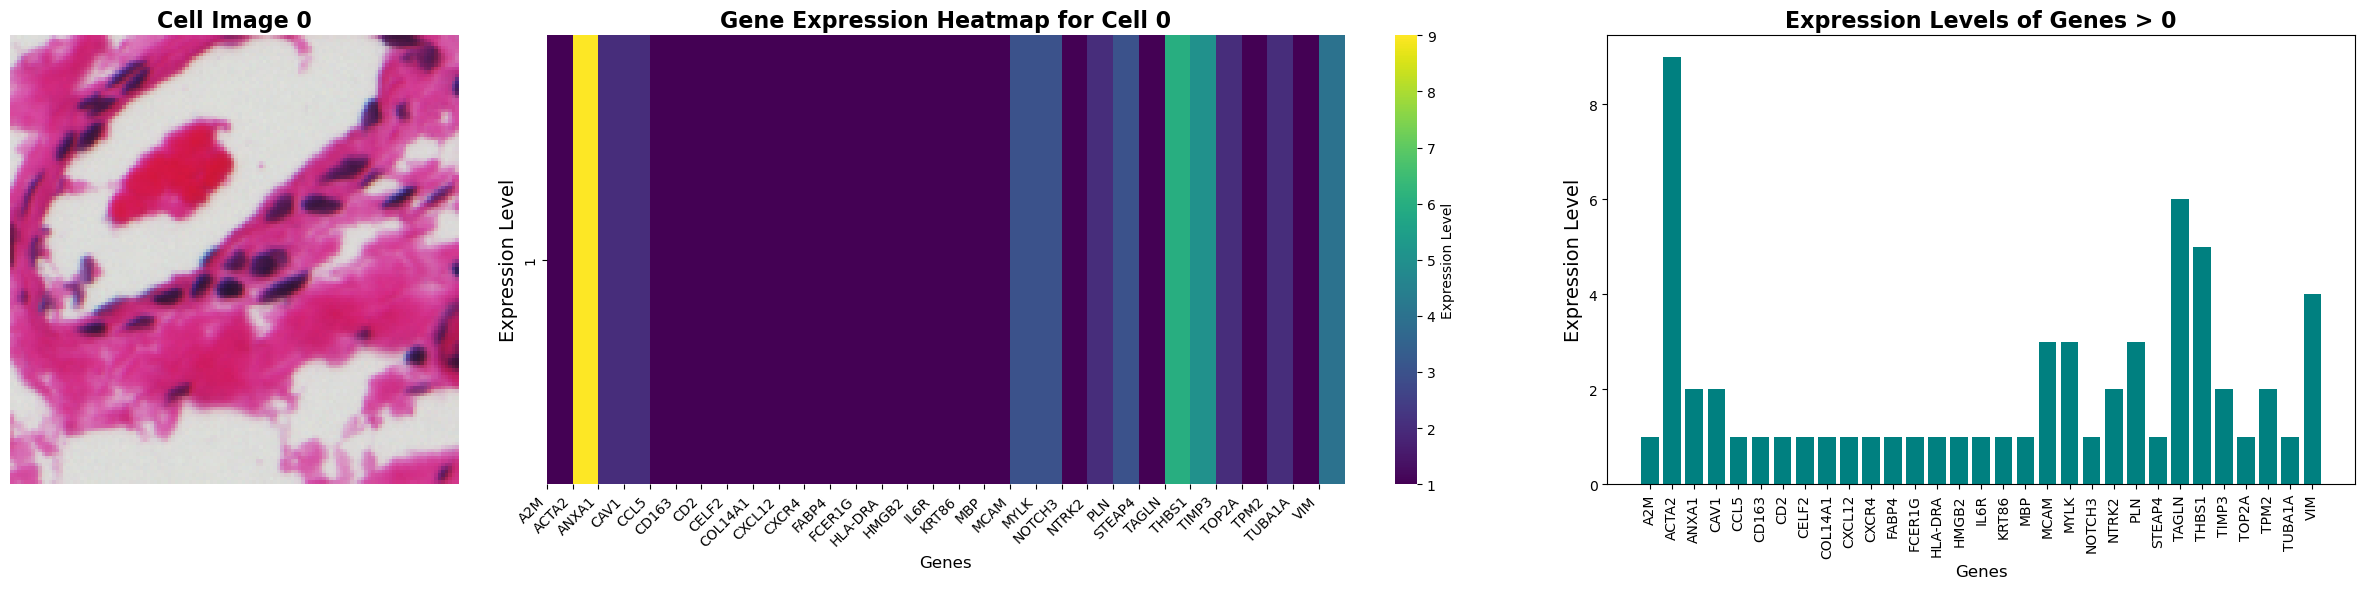

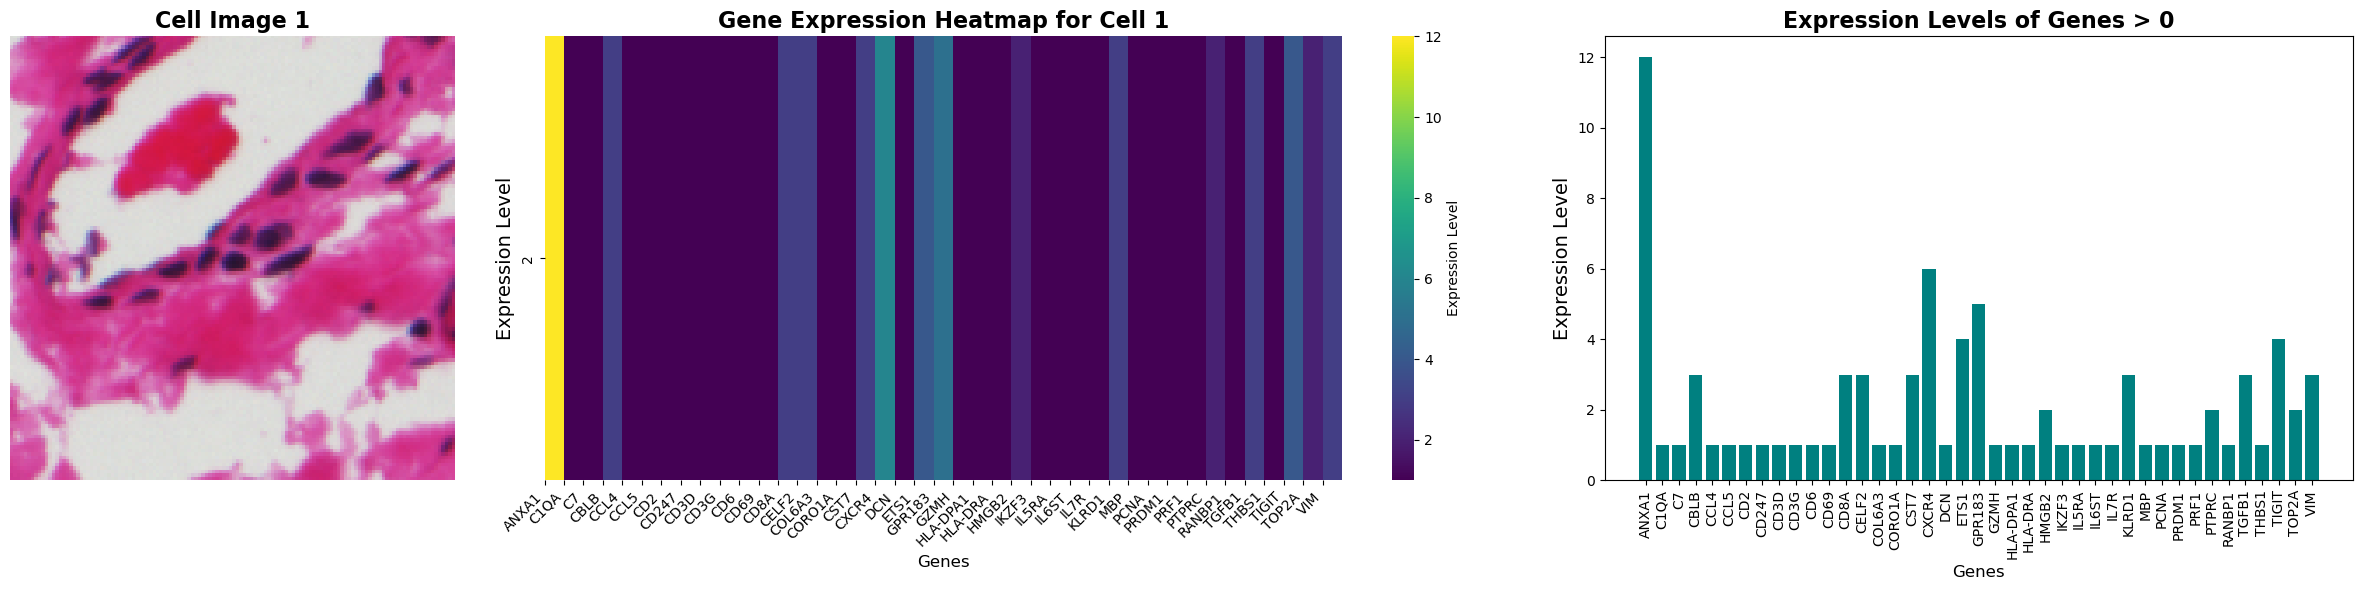

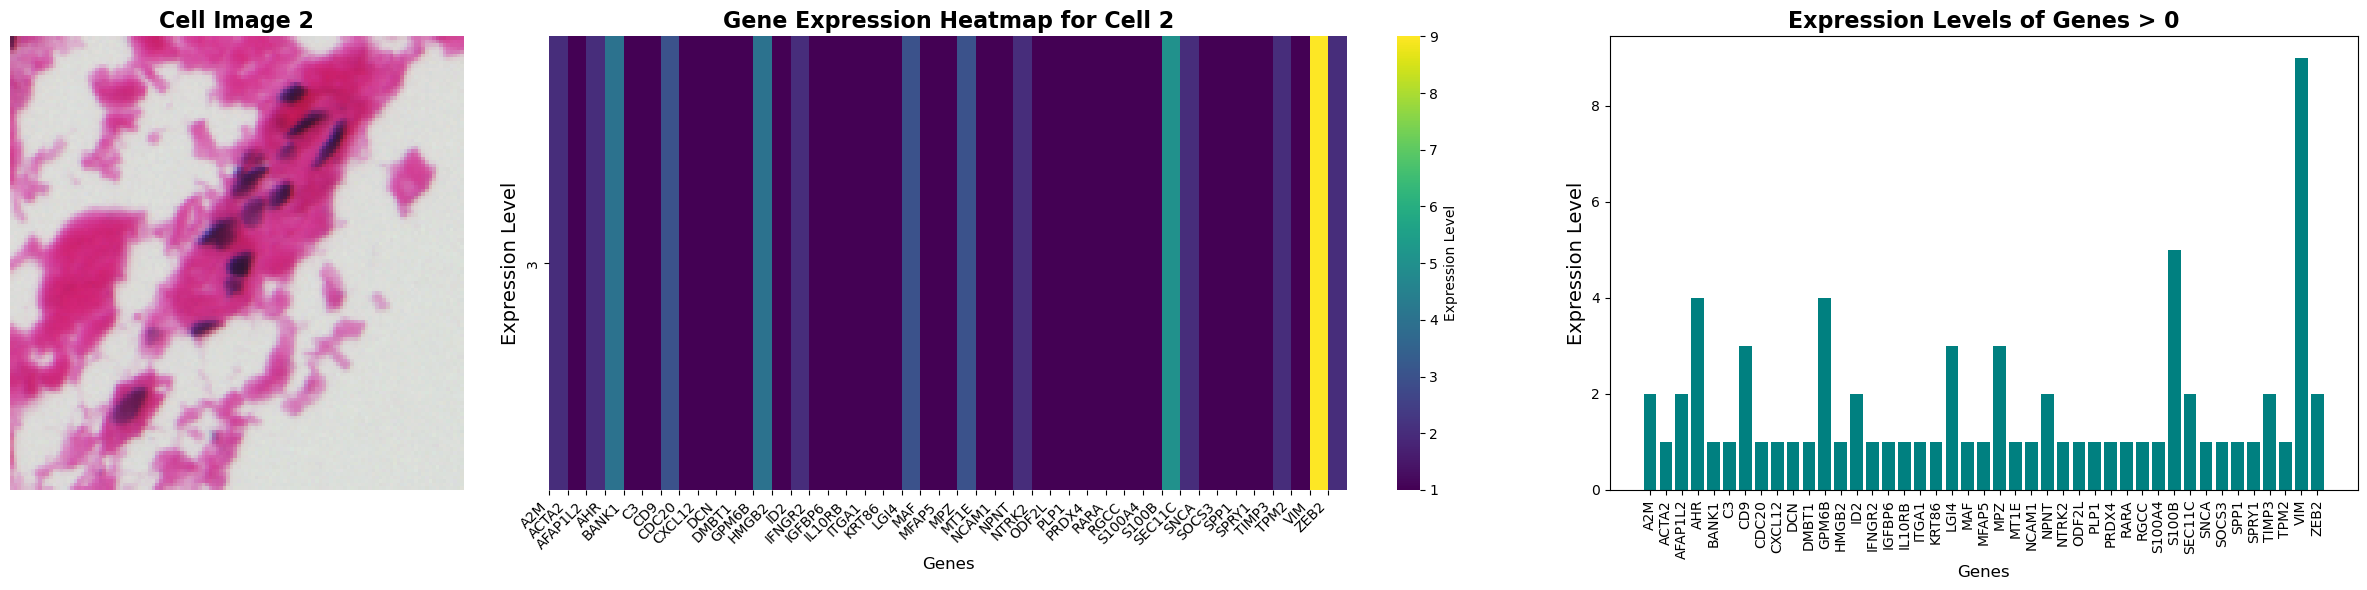

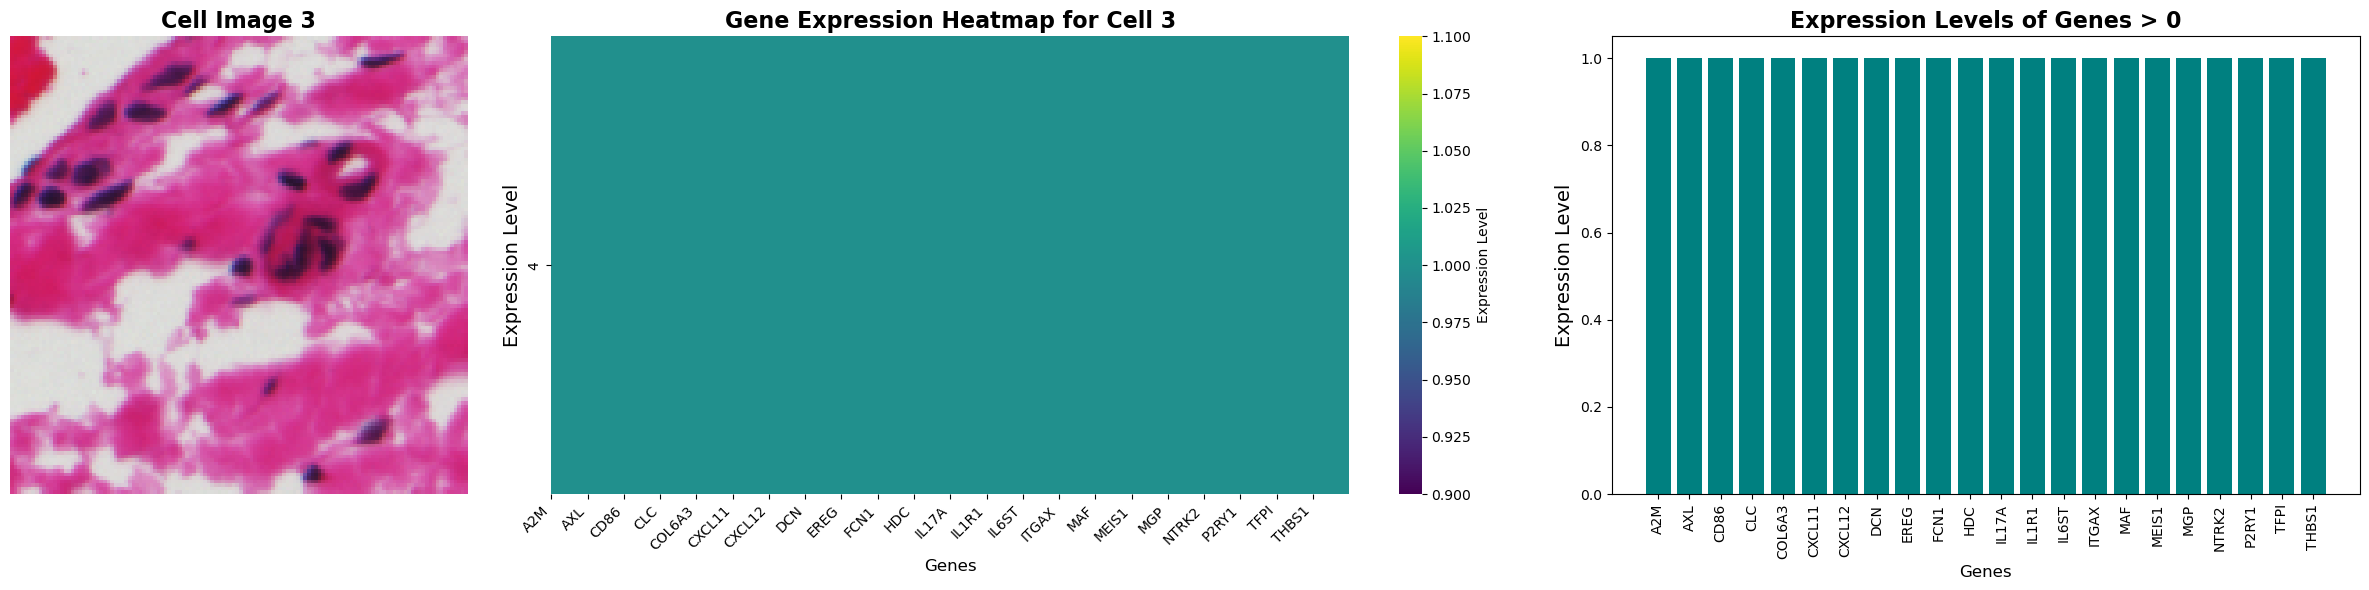

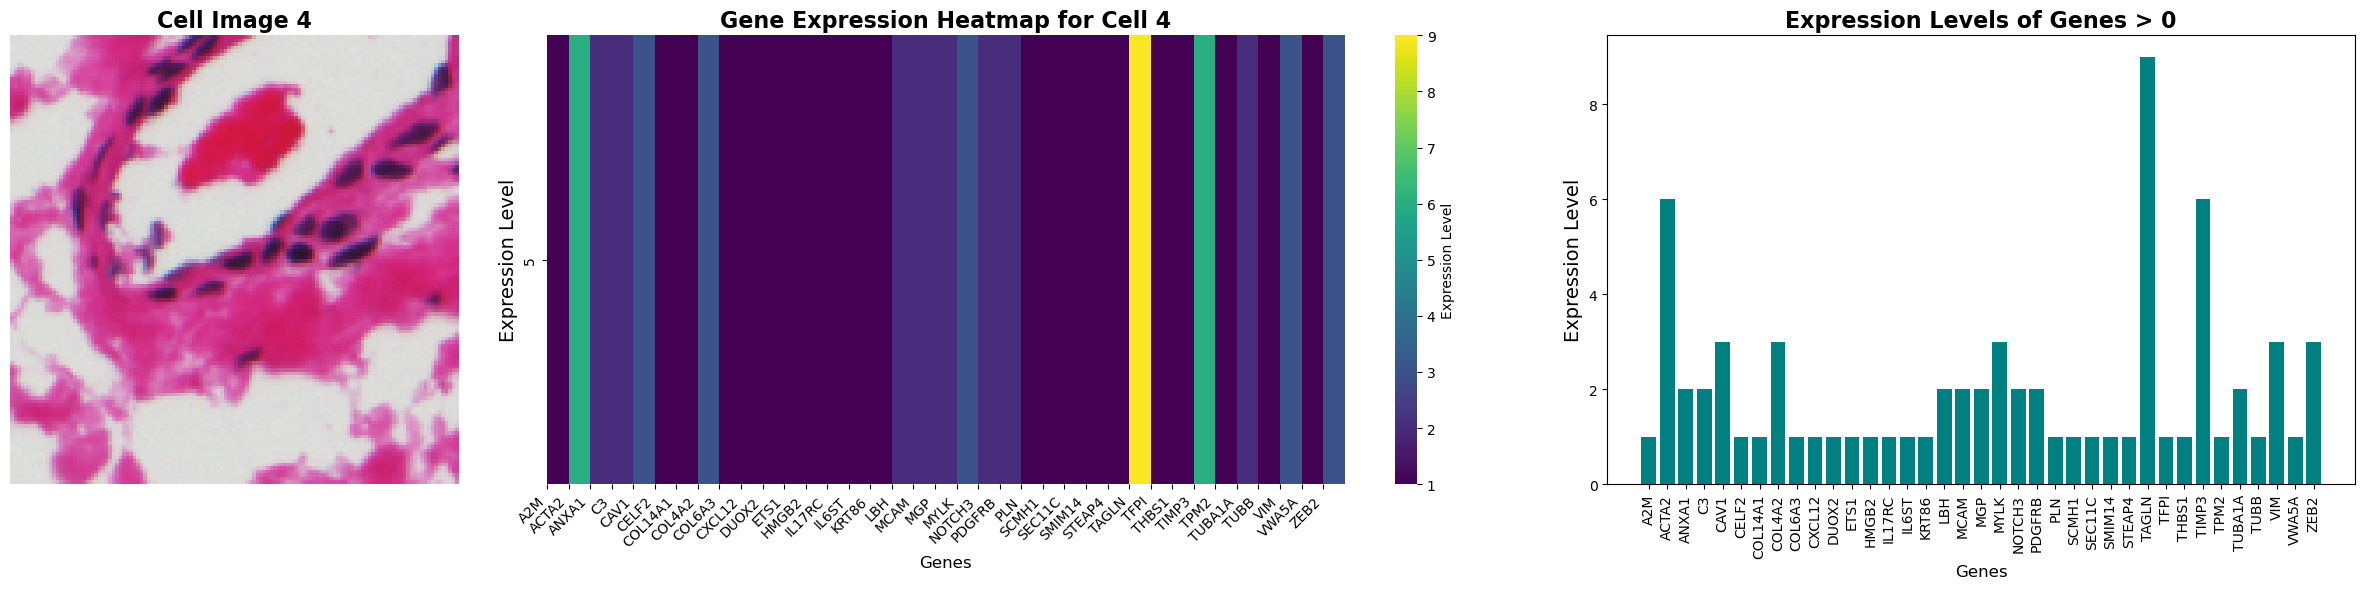

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loop over the first four cells
for cell_id in range(5):
    # Create a figure with three subplots (image, heatmap, and bar chart)
    fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 2, 1.5]}, figsize=(24, 6))

    # First plot: Image of the cell on the left
    ax[0].imshow(crop_list[cell_id].transpose((1, 2, 0)))
    ax[0].set_title(f'Cell Image {cell_id}', fontsize=16, fontweight='bold')
    ax[0].axis('off')  # Hide axes for image clarity

    # Filter the gene expression data to include only genes with expression > 0
    gene_expression_data = y.iloc[cell_id]
    filtered_data = gene_expression_data[gene_expression_data > 0]
    heatmap_data = pd.DataFrame(filtered_data).transpose()

    # Second plot: Gene Expression Heatmap with filtered genes
    sns.heatmap(
        heatmap_data,
        annot=False,
        cmap='viridis',  # Color map for expression levels
        fmt=".2f",
        ax=ax[1],
        cbar_kws={'label': 'Expression Level'}  # Color bar with label
    )

    # Titles and labels with enhanced readability for heatmap
    ax[1].set_title(f'Gene Expression Heatmap for Cell {cell_id}', fontsize=16, fontweight='bold')
    ax[1].set_xlabel('Genes', fontsize=12)
    ax[1].set_ylabel('Expression Level', fontsize=14)
    ax[1].set_xticks(range(len(filtered_data.index)))
    ax[1].set_xticklabels(filtered_data.index, rotation=45, ha='right', fontsize=10)

    # Third plot: Bar Chart for gene expression levels
    ax[2].bar(filtered_data.index, filtered_data.values, color='teal')
    ax[2].set_title("Expression Levels of Genes > 0", fontsize=16, fontweight='bold')
    ax[2].set_xlabel("Genes", fontsize=12)
    ax[2].set_ylabel("Expression Level", fontsize=14)
    ax[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

    # Adjust layout for clarity
    plt.tight_layout()
    plt.show()

# Just using the Avg. Gene expression in train as solution

Using the Xenium spatial transcriptomic object anucleus, take the average gene expression for all 460 genes.

Average expression of each gene across all cells in a spatial transcriptomic tissue section.

In [153]:
from sklearn.model_selection import train_test_split

# Using gene count
X = x_count

# Divide in train and test
train, test = train_test_split(X, test_size=0.2, random_state=42)

In [154]:
avg_train_gene_exp = train.mean()
display(avg_train_gene_exp)

A2M         1.195833
ACP5        0.093895
ACTA2       0.715957
ADAMTSL3    0.096175
AFAP1L2     0.067563
              ...   
WFDC2       0.028190
XBP1        0.873136
XCL2        0.020085
XCR1        0.003124
ZEB2        0.593481
Length: 460, dtype: float64

In [155]:
pred = test.applymap(lambda x: np.nan).fillna(avg_train_gene_exp)

/tmp/ipykernel_3966355/1873875785.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pred = test.applymap(lambda x: np.nan).fillna(avg_train_gene_exp)


In [156]:
pred

,A2M,ACP5,ACTA2,ADAMTSL3,AFAP1L2,AHR,ALDH1B1,ANO1,ANXA1,AQP1,...,VCAN,VIL1,VIM,VPREB3,VWA5A,WFDC2,XBP1,XCL2,XCR1,ZEB2
46377,1.195833,0.093895,0.715957,0.096175,0.067563,0.283044,0.140015,0.037139,0.525668,0.323119,...,0.09024,0.200206,2.108498,0.000328,0.114901,0.02819,0.873136,0.020085,0.003124,0.593481
25073,1.195833,0.093895,0.715957,0.096175,0.067563,0.283044,0.140015,0.037139,0.525668,0.323119,...,0.09024,0.200206,2.108498,0.000328,0.114901,0.02819,0.873136,0.020085,0.003124,0.593481
17247,1.195833,0.093895,0.715957,0.096175,0.067563,0.283044,0.140015,0.037139,0.525668,0.323119,...,0.09024,0.200206,2.108498,0.000328,0.114901,0.02819,0.873136,0.020085,0.003124,0.593481
79737,1.195833,0.093895,0.715957,0.096175,0.067563,0.283044,0.140015,0.037139,0.525668,0.323119,...,0.09024,0.200206,2.108498,0.000328,0.114901,0.02819,0.873136,0.020085,0.003124,0.593481
59859,1.195833,0.093895,0.715957,0.096175,0.067563,0.283044,0.140015,0.037139,0.525668,0.323119,...,0.09024,0.200206,2.108498,0.000328,0.114901,0.02819,0.873136,0.020085,0.003124,0.593481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75716,1.195833,0.093895,0.715957,0.096175,0.067563,0.283044,0.140015,0.037139,0.525668,0.323119,...,0.09024,0.200206,2.108498,0.000328,0.114901,0.02819,0.873136,0.020085,0.003124,0.593481
829,1.195833,0.093895,0.715957,0.096175,0.067563,0.283044,0.140015,0.037139,0.525668,0.323119,...,0.09024,0.200206,2.108498,0.000328,0.114901,0.02819,0.873136,0.020085,0.003124,0.593481
59854,1.195833,0.093895,0.715957,0.096175,0.067563,0.283044,0.140015,0.037139,0.525668,0.323119,...,0.09024,0.200206,2.108498,0.000328,0.114901,0.02819,0.873136,0.020085,0.003124,0.593481
12488,1.195833,0.093895,0.715957,0.096175,0.067563,0.283044,0.140015,0.037139,0.525668,0.323119,...,0.09024,0.200206,2.108498,0.000328,0.114901,0.02819,0.873136,0.020085,0.003124,0.593481


In [132]:
def log1p_normalization(arr):
    # max_vals = arr.max(axis=1, keepdims=True)
    return np.log1p((arr/np.sum(arr, axis=1)) * 100)

def scoring(model_output: pd.DataFrame, ground_truth: pd.DataFrame):
    mse = np.sum((np.square(model_output - ground_truth)).mean(axis=1))
    
    return mse

In [157]:
def log_p_normalization(arr, p=1):
    """
    Applies log-p normalization to each row of the input array or DataFrame.
    
    Parameters:
        arr (np.ndarray or pd.DataFrame): Input data.
        p (float): The base for the logarithm. Default is the natural logarithm (e).
    
    Returns:
        np.ndarray or pd.DataFrame: Log-p normalized data with the same type as input.
    """
    # Normalize by row sums and scale by 100
    if isinstance(arr, pd.DataFrame):
        normalized = arr.div(arr.sum(axis=1), axis=0) * 100
        result = np.log(normalized) / np.log(p)  # Apply log-p
        return result
    elif isinstance(arr, np.ndarray):
        row_sums = arr.sum(axis=1, keepdims=True)
        normalized = (arr / row_sums) * 100
        result = np.log(normalized) / np.log(p)  # Apply log-p
        return result
    else:
        raise TypeError("Input must be a pandas DataFrame or numpy array.")


In [147]:
test/np.sum(test, axis=1)

,35,39,75,88,95,98,106,109,110,114,...,VCAN,VIL1,VIM,VPREB3,VWA5A,WFDC2,XBP1,XCL2,XCR1,ZEB2
46377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
# normalization
log1p_normalization(test)
#pred = log1p_normalization(pred)

,35,39,75,88,95,98,106,109,110,114,...,VCAN,VIL1,VIM,VPREB3,VWA5A,WFDC2,XBP1,XCL2,XCR1,ZEB2
46377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
test.sum().describe()

count      460.000000
mean      2279.008696
std       3514.740731
min          2.000000
25%        265.500000
50%        891.000000
75%       2783.000000
max      33231.000000
dtype: float64

In [140]:
# Scoring
scoring(pred, test)

0.0

In [144]:
pred-test

,35,39,75,88,95,98,106,109,110,114,...,VCAN,VIL1,VIM,VPREB3,VWA5A,WFDC2,XBP1,XCL2,XCR1,ZEB2
46377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
pred

,A2M,ACP5,ACTA2,ADAMTSL3,AFAP1L2,AHR,ALDH1B1,ANO1,ANXA1,AQP1,...,VCAN,VIL1,VIM,VPREB3,VWA5A,WFDC2,XBP1,XCL2,XCR1,ZEB2
46377,1.195833,0.093895,0.715957,0.096175,0.067563,0.283044,0.140015,0.037139,0.525668,0.323119,...,0.09024,0.200206,2.108498,0.000328,0.114901,0.02819,0.873136,0.020085,0.003124,0.593481
25073,1.195833,0.093895,0.715957,0.096175,0.067563,0.283044,0.140015,0.037139,0.525668,0.323119,...,0.09024,0.200206,2.108498,0.000328,0.114901,0.02819,0.873136,0.020085,0.003124,0.593481
17247,1.195833,0.093895,0.715957,0.096175,0.067563,0.283044,0.140015,0.037139,0.525668,0.323119,...,0.09024,0.200206,2.108498,0.000328,0.114901,0.02819,0.873136,0.020085,0.003124,0.593481
79737,1.195833,0.093895,0.715957,0.096175,0.067563,0.283044,0.140015,0.037139,0.525668,0.323119,...,0.09024,0.200206,2.108498,0.000328,0.114901,0.02819,0.873136,0.020085,0.003124,0.593481
59859,1.195833,0.093895,0.715957,0.096175,0.067563,0.283044,0.140015,0.037139,0.525668,0.323119,...,0.09024,0.200206,2.108498,0.000328,0.114901,0.02819,0.873136,0.020085,0.003124,0.593481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75716,1.195833,0.093895,0.715957,0.096175,0.067563,0.283044,0.140015,0.037139,0.525668,0.323119,...,0.09024,0.200206,2.108498,0.000328,0.114901,0.02819,0.873136,0.020085,0.003124,0.593481
829,1.195833,0.093895,0.715957,0.096175,0.067563,0.283044,0.140015,0.037139,0.525668,0.323119,...,0.09024,0.200206,2.108498,0.000328,0.114901,0.02819,0.873136,0.020085,0.003124,0.593481
59854,1.195833,0.093895,0.715957,0.096175,0.067563,0.283044,0.140015,0.037139,0.525668,0.323119,...,0.09024,0.200206,2.108498,0.000328,0.114901,0.02819,0.873136,0.020085,0.003124,0.593481
12488,1.195833,0.093895,0.715957,0.096175,0.067563,0.283044,0.140015,0.037139,0.525668,0.323119,...,0.09024,0.200206,2.108498,0.000328,0.114901,0.02819,0.873136,0.020085,0.003124,0.593481
